Data comes from Pensylvania's [Department of Environmental Protection](https://www.dep.pa.gov/DataandTools/Reports/Oil%20and%20Gas%20Reports/pages/default.aspx), specifically their [permits issued database](http://cedatareporting.pa.gov/Reportserver/Pages/ReportViewer.aspx?/Public/DEP/OG/SSRS/Permits_Issued_Detail) for a request from 1969 to 11/23/2021.

# Reading in and cleaning

## Read in the permits database

In [143]:
import pandas as pd

df = pd.read_csv('Permits_Issued_Detail.csv')
df.columns = df.columns.str.lower()

## Make sure you can see all of the columns!

I didn't remove extra ones for you this time! It's a trick that involves `pd.set_option`.

In [144]:
pd.set_option('display.max_columns', 25)

## Speaking of columns, is anything a datetime?

In [145]:
# No datetimes at the moment, but potential conversion for permit_issued_date

df.dtypes

region                    object
county                    object
municipality              object
permit_issued_date        object
operator                  object
application_type          object
auth_type_description     object
well_api                  object
unconventional            object
configuration             object
well_type                 object
farm_name                 object
spud_date                 object
latitude_degrees          object
longitude_degrees         object
latitude_decimal         float64
longitude_decimal        float64
ogo_num                   object
operator_address          object
city                      object
state                     object
zip_code                  object
authorization_id           int64
client_id                  int64
prmry_fac_id               int64
dtype: object

## I would like the permit issued date to be a datetime

You can do this either right now or through `.read_csv`, either way is fine. It isn't a big dataset, so there's no downside to doing it a slower way!

In [146]:
df.permit_issued_date = pd.to_datetime(df.permit_issued_date, format='%Y-%m-%d')

# Looking at issue dates

## When was the earlier permit in this dataset issued?

In [147]:
df.sort_values(by='permit_issued_date').head(n=1).permit_issued_date

56672   1969-01-02
Name: permit_issued_date, dtype: datetime64[ns]

## What year has the most permits issued?

I wouldn't expect this to be seasonal, but who knows - it gets pretty cold in Pennsylvania in the winter, so maybe everyone just sleeps all the time?

In [148]:
df.resample('Y', on='permit_issued_date').size().sort_values(ascending=False)

permit_issued_date
1984-12-31    13827
1981-12-31     9483
1982-12-31     9266
1983-12-31     8003
2008-12-31     7974
1985-12-31     7839
1980-12-31     7618
2006-12-31     7345
2007-12-31     7299
2010-12-31     6597
2009-12-31     6241
2005-12-31     6045
2011-12-31     5745
1978-12-31     5178
1979-12-31     4991
2013-12-31     4612
2004-12-31     4602
2014-12-31     4451
2012-12-31     4217
1976-12-31     3881
2003-12-31     3830
1977-12-31     3828
1973-12-31     3669
1986-12-31     3483
1972-12-31     3384
1975-12-31     3354
1974-12-31     3272
2002-12-31     3193
2001-12-31     3011
1969-12-31     2781
1970-12-31     2756
1971-12-31     2642
2015-12-31     2525
1987-12-31     2452
2000-12-31     2290
2017-12-31     2225
2018-12-31     2149
1988-12-31     2085
1991-12-31     2003
1990-12-31     1993
1998-12-31     1988
1999-12-31     1981
1997-12-31     1878
1996-12-31     1820
1989-12-31     1797
2019-12-31     1705
1992-12-31     1677
1994-12-31     1658
2016-12-31     1482
1

## **Graph permits issued by month**

Make sure the x axis is in the right order!

<AxesSubplot:xlabel='permit_issued_date'>

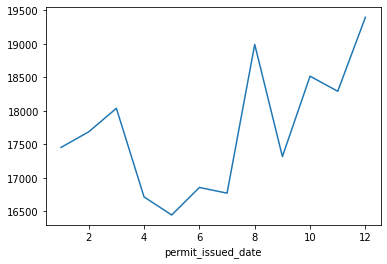

In [149]:
df.groupby(by=[df.permit_issued_date.dt.month]).size().plot()

## What's the difference between doing `.plot()` and `.plot(kind='bar')`? Which one do you feel is a better representation of the data?

<AxesSubplot:xlabel='permit_issued_date'>

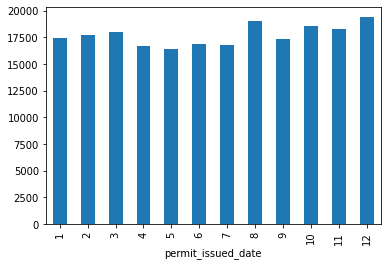

In [150]:
df.groupby(by=[df.permit_issued_date.dt.month]).size().plot(kind='bar')

# The better representation here I think is the line plot, but that's mostly due to y-axis

### Bonus trick: axis labeling

**If you want to make your graphs look a little nicer, you can use some manual effort and make it happen!** In matplotlib, `.set_xticks` will show what tick marks to put on the bottom axis, and `set_xticklabels` will give them names. So for example, the code below will plot January, June and December on your graph.

```python
ax = df......plot()
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])
```

Compare the results for `.plot()` vs `.plot(kind='bar')`. In theory the difference makes sense because bar plots are for categorical data, but speaking honestly: _matplotlib is a nightmare._

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

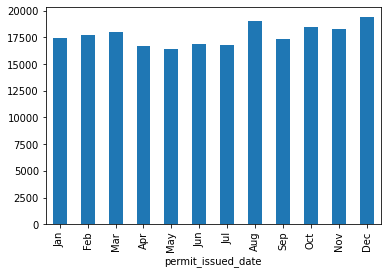

In [151]:
ax = df.groupby(by=[df.permit_issued_date.dt.month]).size().plot(kind='bar')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Permits over time

## Graph permits issued by week (W), month (M) and quarter (Q)

Which is the best representation of the trend in issued permits?

<AxesSubplot:xlabel='permit_issued_date'>

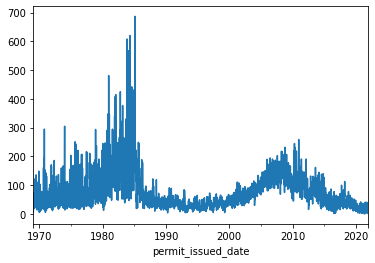

In [152]:
df.resample('W', on='permit_issued_date').size().plot()

<AxesSubplot:xlabel='permit_issued_date'>

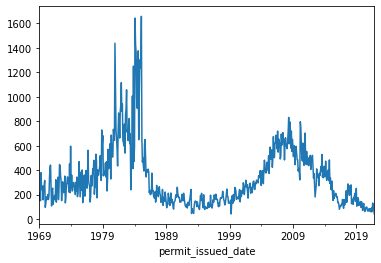

In [153]:
df.resample('M', on='permit_issued_date').size().plot()

'\nQuarter is preferable because it smooths out the graph due to the smaller number of data points \nand the sheer length of time\n'

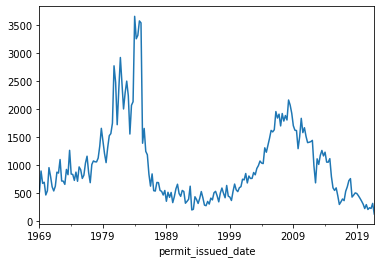

In [154]:
df.resample('Q', on='permit_issued_date').size().plot()

"""
Quarter is preferable because it smooths out the graph due to the smaller number of data points 
and the sheer length of time
"""

## What month had the fewest permits issued?

In [155]:
df.resample('M', on='permit_issued_date').size().sort_values()

permit_issued_date
1999-04-30      42
2021-11-30      43
1993-01-31      46
1993-05-31      47
1993-04-30      55
              ... 
1984-08-31    1376
1984-03-31    1427
1980-12-31    1438
1984-02-29    1644
1985-02-28    1658
Length: 635, dtype: int64

In [156]:
"""
It seems a valid month to analyze, but if you were talking about November 2021, which has the 2nd fewest, then it
would be incomplete data since the month literally hasn't finished
"""

"\nIt seems a valid month to analyze, but if you were talking about November 2021, which has the 2nd fewest, then it\nwould be incomplete data since the month literally hasn't finished\n"

I'm going to tell you: **this is not a valid month to analyze.** Why not?

## What year had the most permits issued?

In [157]:
df.resample('Y', on='permit_issued_date').size().sort_values(ascending=False)

permit_issued_date
1984-12-31    13827
1981-12-31     9483
1982-12-31     9266
1983-12-31     8003
2008-12-31     7974
1985-12-31     7839
1980-12-31     7618
2006-12-31     7345
2007-12-31     7299
2010-12-31     6597
2009-12-31     6241
2005-12-31     6045
2011-12-31     5745
1978-12-31     5178
1979-12-31     4991
2013-12-31     4612
2004-12-31     4602
2014-12-31     4451
2012-12-31     4217
1976-12-31     3881
2003-12-31     3830
1977-12-31     3828
1973-12-31     3669
1986-12-31     3483
1972-12-31     3384
1975-12-31     3354
1974-12-31     3272
2002-12-31     3193
2001-12-31     3011
1969-12-31     2781
1970-12-31     2756
1971-12-31     2642
2015-12-31     2525
1987-12-31     2452
2000-12-31     2290
2017-12-31     2225
2018-12-31     2149
1988-12-31     2085
1991-12-31     2003
1990-12-31     1993
1998-12-31     1988
1999-12-31     1981
1997-12-31     1878
1996-12-31     1820
1989-12-31     1797
2019-12-31     1705
1992-12-31     1677
1994-12-31     1658
2016-12-31     1482
1

**Why so many in the early 80's?** There was money to be made! But [then it all came crashing down](https://en.wikipedia.org/wiki/1980s_oil_glut).

If we were historians or economists this dataset could be a lot more fun.

# Application Types

## What are the different application types?

There are three types of applications: new, renewals, and modifications. How many of each type are in this dataset?

In [158]:
df.groupby('application_type').size().sort_values()

application_type
MOD      1778
REN      8165
NEW    202528
dtype: int64

## How many of each application type were granted in each month?

I don't know if we've ever done this! But think about it: 

1. You want to put them into groups based on their month. What's the `groupby` equivalent for time?
2. You want to count the number of applications types, just like you did in the cell above.

The result should look something like this:

```
PERMIT_ISSUED_DATE  APPLICATION_TYPE
2000-11-30          NEW                 157
                    REN                   7
2000-12-31          NEW                 194
                    REN                   8
2001-01-31          NEW                 228
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
```

In [159]:
df.resample('M', on='permit_issued_date').application_type.value_counts()

permit_issued_date  application_type
1969-01-31          NEW                 156
1969-02-28          NEW                 215
1969-03-31          NEW                 151
1969-04-30          NEW                 380
1969-05-31          NEW                 242
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
Name: application_type, Length: 1055, dtype: int64

### Converting into a dataframe

If we wanted to plot how new vs renewals vs modifications changed over time, we can't just do `.plot()`. I mean, try it, see what happens!

<AxesSubplot:xlabel='permit_issued_date,application_type'>

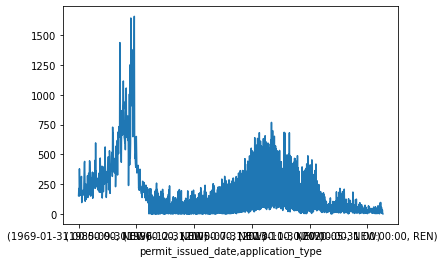

In [160]:
df.resample('M', on='permit_issued_date').application_type.value_counts().plot()

**It's awful.** But here's what you can do to switch the month-category groups into something nice: remove the `.plot()`, toss an `.unstack()` on the end, and you'll end up with something like this:

|APPLICATION_TYPE|MOD|NEW|REN|
|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|2000-11-30|NaN|157.0|7.0|
|2000-12-31|NaN|194.0|8.0|
|...|...|...|...|

In [161]:
df.resample('M', on='permit_issued_date').application_type.value_counts().unstack()

application_type,MOD,NEW,REN
permit_issued_date,,,
1969-01-31,NaN,156.0,NaN
1969-02-28,NaN,215.0,NaN
1969-03-31,NaN,151.0,NaN
1969-04-30,NaN,380.0,NaN
1969-05-31,NaN,242.0,NaN
...,...,...,...
2021-07-31,3.0,45.0,14.0
2021-08-31,17.0,92.0,22.0
2021-09-30,12.0,98.0,11.0


Nice, right? But even nicer: put a `.plot()` after it.

<AxesSubplot:xlabel='permit_issued_date'>

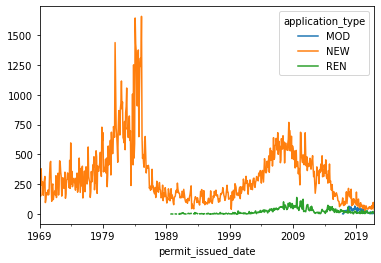

In [162]:
df.resample('M', on='permit_issued_date').application_type.value_counts().unstack().plot()

**Incredible!** This happens because it plots **each column as its own line.** Three columns, three lines!

The practice of moving your data around to get it into the format you want is called **reshaping**, and it's pretty common requirement when you're trying to get a particular kind of graph. You can [watch a YouTube video I made about the topic](https://www.youtube.com/watch?v=O4538i9MQEc) if you'd like to learn more.

## When was the first `MOD` permit issued?

They seem to not exist in the database initially, but showed up at some point later. How can we calculate this? There are a few different methods: some involving filtering, some involving groupby, some involving sorting, some involving `.min()`...

In [163]:
df[df.application_type == 'MOD'].sort_values(by='permit_issued_date').head(n=1).permit_issued_date

18228   2016-11-04
Name: permit_issued_date, dtype: datetime64[ns]

## What are the top five counties for granting new permits?

In [164]:
df[df.application_type == 'NEW'].groupby('county').size().sort_values(ascending=False).head(n=5)

county
McKean     32217
Warren     25840
Venango    24904
Indiana    14241
Forest     10584
dtype: int64

## Create a new dataframe called new_top5 that is only new applications from those five counties

In [165]:
top_5 = df[df.application_type == 'NEW'].groupby('county').size().sort_values(ascending=False).head(n=5).index.array
new_top_5 = df[(df.county.isin(top_5)) & (df.application_type == 'NEW')]

### Confirm your new dataframe has 80667 rows

In [166]:
new_top_5.shape

(107786, 25)

## Plot the number of permits each year. Each county should have its own line.

It should look like this:

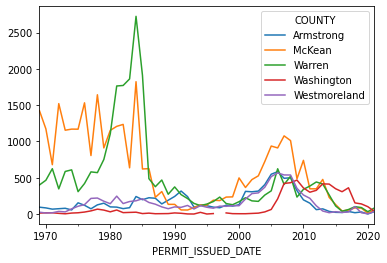

You'll want to do roughly the same thing you did for applications up above:

1. Put them in groups based on their year
2. See how many times each county exists for that year
3. `.unstack().plot()`

Before you plot, you should have a dataframe where **years are rows and counties are columns.** If you have a bazillion lines it's because you're using your original dataframe instead of the new top 5 one.

<AxesSubplot:xlabel='permit_issued_date'>

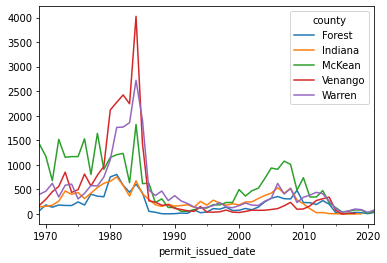

In [167]:
new_top_5.resample('Y', on='permit_issued_date').county.value_counts().unstack().plot()

## The mid-80s hit Warren County especially hard! What was the percentage drop in new permits 1985 and 1986?

### Step one: Calculating

For the code, just put `.pct_change()` on your county-vs-date dataframe, it'll calculate the percentage change between the columns of each row and the row below it. It shoudl look like this:

|COUNTY|Armstrong|McKean|Warren|Washington|Westmoreland|
|---|---|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|1969-12-31|NaN	|NaN|NaN|NaN|NaN|
|1970-12-31|-0.105263|-0.176264|0.162095|0.214286|-0.423077|
|1971-12-31|-0.200000|-0.420290|0.341202|0.058824|0.200000|

In [168]:
df[df.county == 'Warren'].resample('Y', on='permit_issued_date').size().pct_change()

permit_issued_date
1969-12-31         NaN
1970-12-31    0.162095
1971-12-31    0.341202
1972-12-31   -0.444800
1973-12-31    0.691643
1974-12-31    0.037479
1975-12-31   -0.492611
1976-12-31    0.362460
1977-12-31    0.380048
1978-12-31   -0.017212
1979-12-31    0.316988
1980-12-31    0.469415
1981-12-31    0.596380
1982-12-31    0.003968
1983-12-31    0.050819
1984-12-31    0.463192
1985-12-31   -0.298201
1986-12-31   -0.744636
1987-12-31   -0.227459
1988-12-31    0.244032
1989-12-31   -0.417910
1990-12-31    0.377289
1991-12-31   -0.287234
1992-12-31   -0.201493
1993-12-31   -0.275701
1994-12-31   -0.245161
1995-12-31    0.256410
1996-12-31    0.176871
1997-12-31    0.352601
1998-12-31   -0.380342
1999-12-31   -0.103448
2000-12-31    0.323077
2001-12-31    0.319767
2002-12-31   -0.158590
2003-12-31    0.015707
2004-12-31    0.381443
2005-12-31    0.220149
2006-12-31    0.948012
2007-12-31   -0.281005
2008-12-31    0.237991
2009-12-31   -0.580247
2010-12-31    0.508403
2011-12-31    0

### Step two: Writing

But can you turn it into a sentence? Something like...

> after an increase in permits of [blank] percent just two years prior, 1986 saw Warren's new permits plummet a staggering [blank] percent

In [169]:
"""
After an increase in permits of 46% percent just two years prior, 1986 saw Warren's new permits plummet
a staggering 74%
"""

"\nAfter an increase in permits of 46% percent just two years prior, 1986 saw Warren's new permits plummet\na staggering 74%\n"

# Now let's relax a little bit

## Does the government issue permits on the weekends?

To answer this question, calculate the percent of permits are issued on Saturday and Sunday. We know how to get the month and the year and the day of the month from a datetime, but how do you get the day of the week..?

In [170]:
percentage_weekend = df.permit_issued_date.dt.dayofweek.value_counts(normalize=True)[[5, 6]].multiply(100).sum().round(2)

f"The percentage of permits issued on weekends is only {percentage_weekend}%"

'The percentage of permits issued on weekends is only 0.86%'